**Maximizing Revenue for Taxi cab Drivers through Payment Type Analysis**

**Problem Statement**

In this fast-paced taxi booking sector, making most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insight to maximise revenue streams for taxi drivers in order to meet this need. Oer research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount

**Objective**

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash, in  particular, we want to find out if there is a big difference in the fares for those who pay with credit cards verses those who pay with cash.

**Research Question**

Is there a relationship between total fare amount and payment type and we compute customers towards payment methods that generate higher revenue for drivers, without neratively impacting customer experience?

**Imporitng Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/content/yellow_tripdata_2020-01.csv', on_bad_lines='skip')

In [6]:
data.shape

(5926961, 18)

**Expolaratory data Analysis**

In [7]:
data.dtypes

,0
VendorID,int64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,float64
DOLocationID,float64
payment_type,float64


In [8]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], errors='coerce')

In [9]:
data.dtypes

,0
VendorID,int64
tpep_pickup_datetime,datetime64[ns]
tpep_dropoff_datetime,datetime64[ns]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,float64
DOLocationID,float64
payment_type,float64


In [10]:
data['duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [11]:
data['duration']= data['duration'].dt.total_seconds()/60

In [12]:

data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926956,2,2020-01-30 10:53:02,2020-01-30 11:03:56,1.0,1.52,1.0,N,246.0,230.0,1.0,9.0,0.0,0.5,2.46,0.0,0.3,14.76,2.5,10.900000
5926957,2,2020-01-30 10:08:14,2020-01-30 10:35:12,1.0,2.46,1.0,N,170.0,50.0,2.0,17.0,0.0,0.5,0.00,0.0,0.3,20.30,2.5,26.966667
5926958,2,2020-01-30 10:17:14,2020-01-30 10:25:22,1.0,1.07,1.0,N,237.0,236.0,1.0,7.0,0.0,0.5,3.09,0.0,0.3,13.39,2.5,8.133333
5926959,2,2020-01-30 10:26:44,2020-01-30 10:41:05,1.0,1.74,1.0,N,236.0,161.0,1.0,10.5,0.0,0.5,3.45,0.0,0.3,17.25,2.5,14.350000


In [13]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'duration'],
      dtype='object')

In [14]:
data = data[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [15]:

data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
5926956,1.0,1.0,9.0,1.52,10.900000
5926957,1.0,2.0,17.0,2.46,26.966667
5926958,1.0,1.0,7.0,1.07,8.133333
5926959,1.0,1.0,10.5,1.74,14.350000


In [16]:
data.isnull().sum()

,0
passenger_count,1
payment_type,1
fare_amount,1
trip_distance,1
duration,1


In [17]:
data.dropna(inplace = True)

In [18]:
data.isnull().sum()

,0
passenger_count,0
payment_type,0
fare_amount,0
trip_distance,0
duration,0


In [19]:
data.dtypes

,0
passenger_count,float64
payment_type,float64
fare_amount,float64
trip_distance,float64
duration,float64


In [20]:
data.duplicated().sum()

3067890

In [21]:
data.drop_duplicates(inplace=True)

In [22]:
data.duplicated().sum()

0

In [23]:
data['passenger_count'].value_counts(normalize = True)

,proportion
passenger_count,
1.0,0.582728
2.0,0.190523
3.0,0.066195
5.0,0.062536
6.0,0.038958
4.0,0.036040
0.0,0.023000
7.0,0.000009
8.0,0.000006


In [24]:
data['payment_type'].value_counts()/len(data)

,count
payment_type,
1.0,6.773304e-01
2.0,3.086217e-01
3.0,8.654562e-03
4.0,5.393012e-03
5.0,3.497641e-07


In [25]:
data[data['payment_type']<3]
data = data[(data['passenger_count']>0) & (data['passenger_count']<6)]

In [26]:
data.shape

(2681869, 5)

In [27]:
data['payment_type']=data['payment_type'].map({1:'Card',2:'Cash'})

In [28]:
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,Card,6.0,1.20,4.800000
1,1.0,Card,7.0,1.20,7.416667
2,1.0,Card,6.0,0.60,6.183333
3,1.0,Card,5.5,0.80,4.850000
4,1.0,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
5926946,1.0,Card,37.5,9.81,48.066667
5926952,1.0,Card,18.0,5.45,14.166667
5926953,1.0,Card,11.5,0.87,18.300000
5926954,1.0,Cash,21.5,4.85,27.750000


In [29]:
data.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.681869e+06,2.681869e+06,2.681869e+06,2.681869e+06
mean,1.726185e+00,1.749478e+01,4.480031e+00,2.372104e+01
std,1.170693e+00,1.523722e+01,4.878773e+00,9.174764e+01
min,1.000000e+00,-1.238000e+03,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,8.500000e+00,1.470000e+00,9.633333e+00
50%,1.000000e+00,1.300000e+01,2.690000e+00,1.545000e+01
75%,2.000000e+00,2.050000e+01,5.380000e+00,2.300000e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [30]:
data = data[data['fare_amount']>0]
data = data[data['trip_distance']>0]
data = data[data['duration']>0]

In [31]:
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,Card,6.0,1.20,4.800000
1,1.0,Card,7.0,1.20,7.416667
2,1.0,Card,6.0,0.60,6.183333
3,1.0,Card,5.5,0.80,4.850000
5,1.0,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
5926946,1.0,Card,37.5,9.81,48.066667
5926952,1.0,Card,18.0,5.45,14.166667
5926953,1.0,Card,11.5,0.87,18.300000
5926954,1.0,Cash,21.5,4.85,27.750000


<Axes: ylabel='fare_amount'>

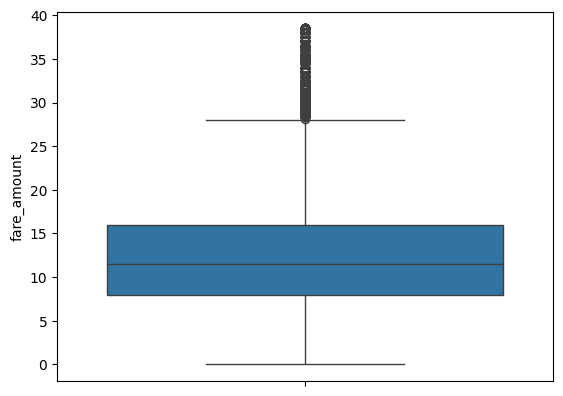

In [51]:
sns.boxplot(data['fare_amount'])

In [34]:
for col in ['fare_amount','trip_distance','duration']:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - 1.5*IQR
  upper_bound = q3 + 1.5*IQR
  data = data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]

In [49]:
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,Card,6.0,1.20,4.800000
1,1.0,Card,7.0,1.20,7.416667
2,1.0,Card,6.0,0.60,6.183333
3,1.0,Card,5.5,0.80,4.850000
5,1.0,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
5926943,5.0,Card,6.0,0.80,5.966667
5926952,1.0,Card,18.0,5.45,14.166667
5926953,1.0,Card,11.5,0.87,18.300000
5926954,1.0,Cash,21.5,4.85,27.750000


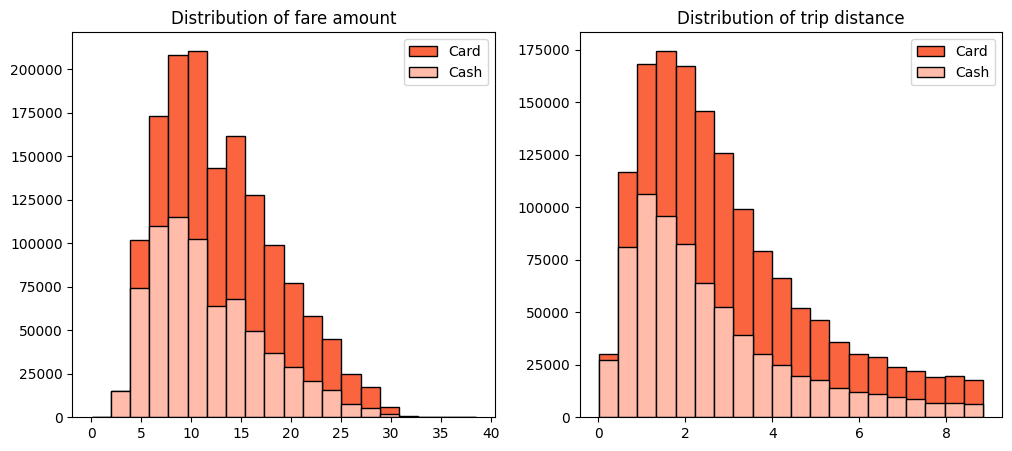

In [37]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title("Distribution of fare amount")
plt.hist(data[data['payment_type']=="Card"]['fare_amount'],histtype = "barstacked",bins = 20,edgecolor = "k",color = "#FA643F",label = "Card")
plt.hist(data[data['payment_type']=="Cash"]['fare_amount'],histtype = "barstacked",bins = 20,edgecolor = "k",color = "#FFBCAB",label = "Cash")
plt.legend(['Card','Cash'])

plt.subplot(1,2,2)
plt.title("Distribution of trip distance")
plt.hist(data[data['payment_type']=="Card"]['trip_distance'],histtype = "barstacked",bins = 20,edgecolor = "k",color = "#FA643F",label = "Card")
plt.hist(data[data['payment_type']=="Cash"]['trip_distance'],histtype = "barstacked",bins = 20,edgecolor = "k",color = "#FFBCAB",label = "Cash")
plt.legend(['Card','Cash'])


In [38]:
data.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           12.952568  5.760400      2.951696  1.960264
Cash           11.648429  5.541628      2.575485  1.887572

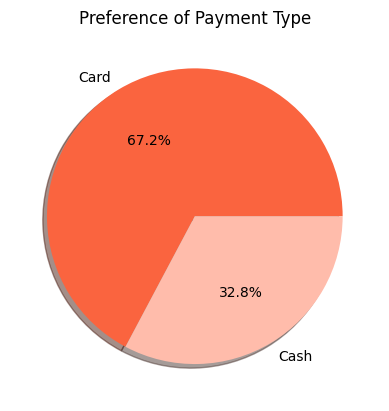

In [39]:
plt.title("Preference of Payment Type")
plt.pie(data['payment_type'].value_counts(),labels = data['payment_type'].value_counts().index,shadow = True,autopct = "%1.1f%%",colors = ["#FA643F","#FFBCAB"])
plt.show()

In [40]:

passenger_count = data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)

In [41]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [42]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1.0,864234,39.573528
1,Card,2.0,311242,14.251862
2,Card,3.0,115720,5.298853
3,Card,4.0,60208,2.756942
4,Card,5.0,116825,5.349451
5,Cash,1.0,439451,20.122590
6,Cash,2.0,148002,6.777055
7,Cash,3.0,51860,2.374685
8,Cash,4.0,31253,1.431084
9,Cash,5.0,45074,2.063952


In [43]:
# data = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
# data['payment_type'] = ["Card","Cash"]
# data.iloc[0,1:] = passenger_count.iloc[0:5,-1]
# data.iloc[1,1:] = passenger_count.iloc[5:, -1]
# data

passenger_count_summary = pd.DataFrame(columns = ['payment_type',1,2,3,4,5]) # Renamed to passenger_count_summary
passenger_count_summary['payment_type'] = ["Card","Cash"]
passenger_count_summary.iloc[0,1:] = passenger_count.iloc[0:5,-1]
passenger_count_summary.iloc[1,1:] = passenger_count.iloc[5:, -1]
passenger_count_summary

,payment_type,1,2,3,4,5
0,Card,39.573528,14.251862,5.298853,2.756942,5.349451
1,Cash,20.12259,6.777055,2.374685,1.431084,2.063952


**Null Hypothesis**: There is no difference in average fare between customers who use credit cards and customers who use cash

**Alternative Hypothesis**: There is a difference in average fare between customers who use credit cards and customers who use card

In [44]:
import statsmodels as  sm
import statsmodels.graphics.gofplots as qqplot

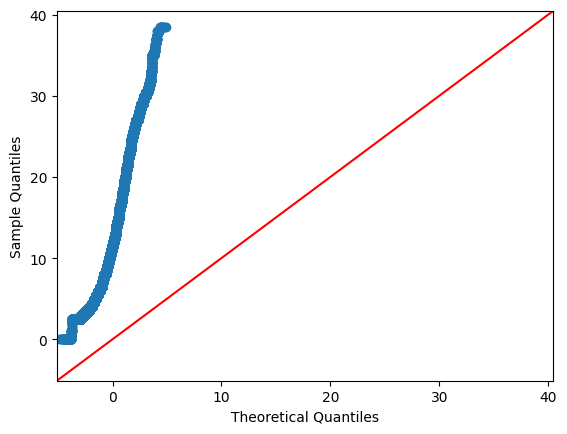

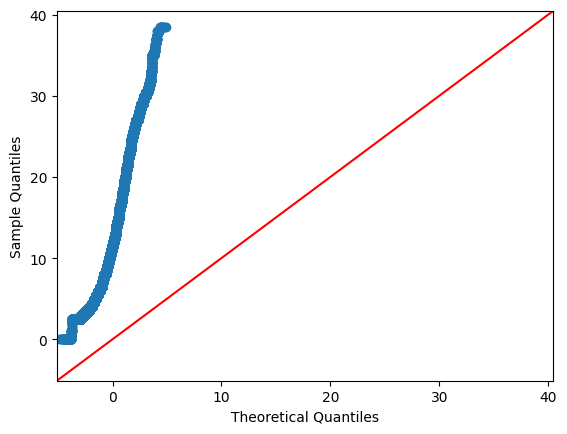

In [45]:
qqplot.qqplot(data["fare_amount"], line="45")

In [46]:
card_sample = data[data['payment_type']=="Card"]['fare_amount']
cash_sample = data[data['payment_type']=="Cash"]['fare_amount']

In [47]:
t_test,p_test = st.ttest_ind(a = card_sample,b= cash_sample,equal_var = False)
print("T statistics",t_test)
print("P-value",p_test)

T statistics 161.12484911532925
P-value 0.0


**End of this Code**